# First Exploration Notebook

## Objective

The objective of this notebook is to conduct an **initial exploration of the dataset**. Through this process, the aim is to:

1. **Understand the Dataset Structure**: Analyze the columns, data types, and unique values present in the dataset to comprehend how it is organized. This includes identifying numerical, categorical variables, and any missing values.

2. **Document Observations**: Record any significant findings during the exploration, such as patterns, trends, anomalies, or inconsistencies in the data.

3. **Define Future Actions**: Based on the observations made, a list of potential actions to be taken in future phases of the project will be developed. These actions may include:
   - Data cleaning, such as imputing missing values or removing duplicates.
   - Necessary transformations to prepare the data for analysis.
   - Identifying relevant features for modeling.

This notebook will serve as a fundamental starting point to guide the project's development and ensure that any issues that may arise are adequately addressed along the way.

In [1]:
import pandas as pd
import numpy as np

%run ../telco_customer_churn/utils/pandas_missing_handler.py
%run ../telco_customer_churn/utils/pandas_explorer.py

In [2]:
path = '../telco_customer_churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Some columns have type issues.

## Looking for missing values:

In [5]:
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
customerID,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,0,0,0,0,0,0,0,0,0,0,0
Dependents,0,0,0,0,0,0,0,0,0,0,0
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,0,0,0,0,0,0,0,0,0,0,0
MultipleLines,0,0,0,0,0,0,0,0,0,0,0
InternetService,0,0,0,0,0,0,0,0,0,0,0
OnlineSecurity,0,0,0,0,0,0,0,0,0,0,0


- The "TotalCharges" column contains some empty string values.

## Replacing the empty string values in "TotalCharges" with NaN:

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
customerID,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,0,0,0,0,0,0,0,0,0,0,0
Dependents,0,0,0,0,0,0,0,0,0,0,0
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,0,0,0,0,0,0,0,0,0,0,0
MultipleLines,0,0,0,0,0,0,0,0,0,0,0
InternetService,0,0,0,0,0,0,0,0,0,0,0
OnlineSecurity,0,0,0,0,0,0,0,0,0,0,0


## Removing the "id" column because it does not provide relevant information:

In [7]:
df.drop('customerID',axis=1,inplace=True)

## Exploring the "Gender" column:

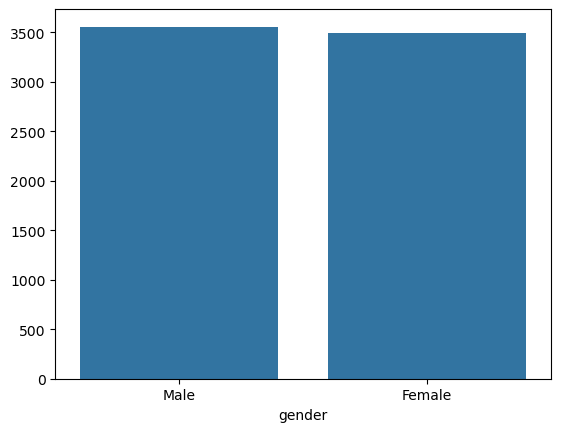

(None,
 gender
 Male      3555
 Female    3488
 Name: count, dtype: int64)

In [8]:
df.explorer.categorical_dist('gender')

- The "gender" column has a balanced distribution.
- It is written in string format, so it is necessary to map it for one-hot encoding.

## Exploring the "SeniorCitizen" column:

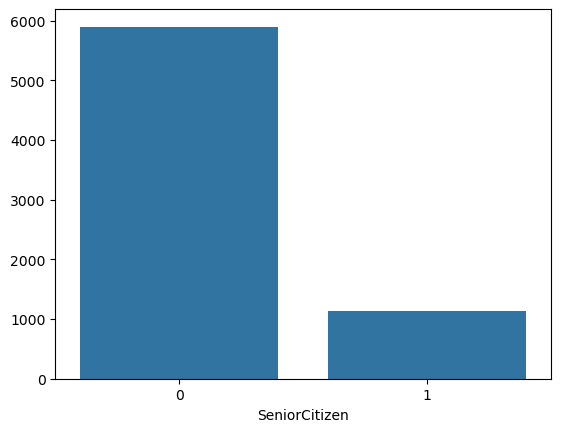

(None,
 SeniorCitizen
 0    5901
 1    1142
 Name: count, dtype: int64)

In [9]:
df.explorer.categorical_dist('SeniorCitizen')

- It has a lot of negative values, which means that there are many more young people than senior people in this sample.
- The data is already in numerical format, so there’s no need to map it.

## Exploring "Partner" column:

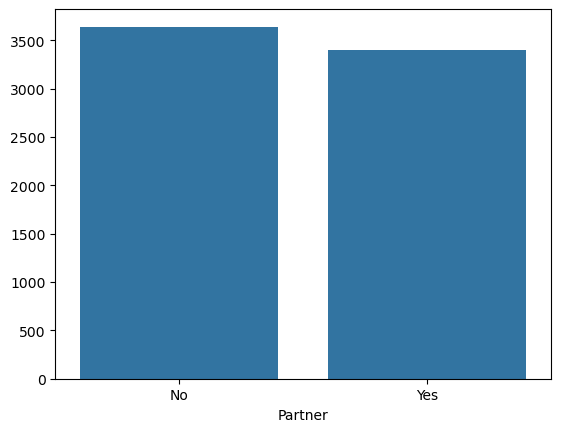

(None,
 Partner
 No     3641
 Yes    3402
 Name: count, dtype: int64)

In [10]:
df.explorer.categorical_dist('Partner')

- It has a well-balanced distribution.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring "Dependents" column:

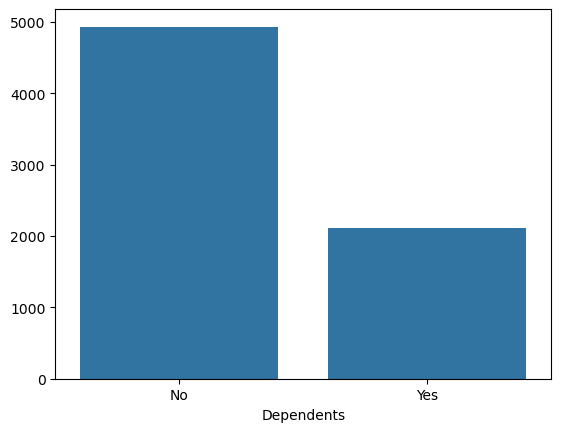

(None,
 Dependents
 No     4933
 Yes    2110
 Name: count, dtype: int64)

In [11]:
df.explorer.categorical_dist('Dependents')

- The distribution is unbalanced, with more than double the negative (No) values compared to the positive ones (Yes).
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "tenure" column:

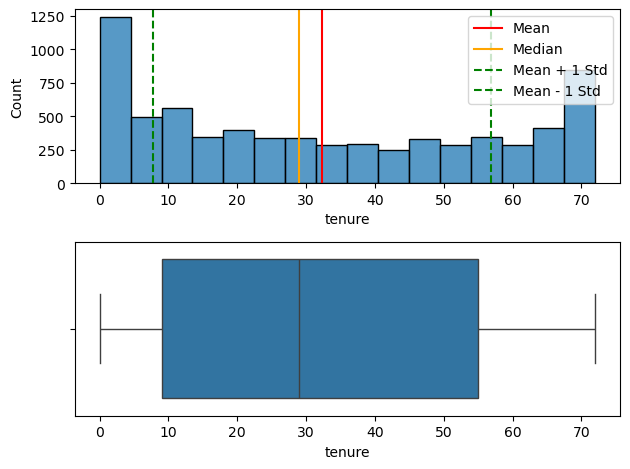

(None,
 tenure
 1     613
 72    362
 2     238
 3     200
 4     176
      ... 
 28     57
 39     56
 44     51
 36     50
 0      11
 Name: count, Length: 73, dtype: int64)

In [12]:
df.explorer.numerical_dist('tenure')

- It has a bimodal distribution with a high number of records in the 0-5 range and the 65-70 range, flat in the middle with higher frequencies on both sides; it may require a non-linear transformation.

## Exploring the "PhoneService" column:

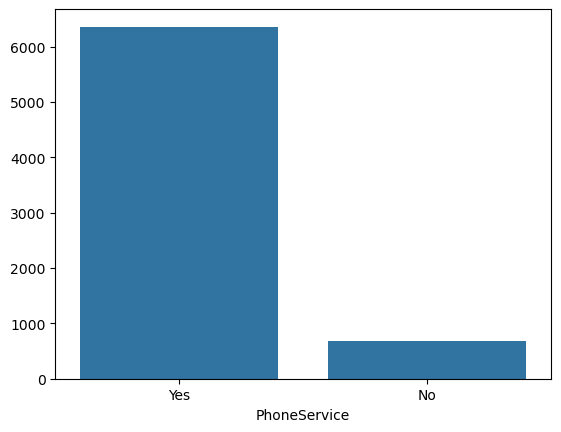

(None,
 PhoneService
 Yes    6361
 No      682
 Name: count, dtype: int64)

In [13]:
df.explorer.categorical_dist('PhoneService')

- It has a very unbalanced distribution.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "MultipleLines" column:

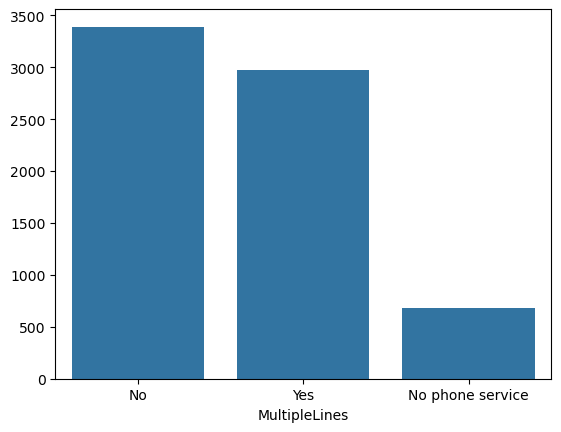

(None,
 MultipleLines
 No                  3390
 Yes                 2971
 No phone service     682
 Name: count, dtype: int64)

In [14]:
df.explorer.categorical_dist('MultipleLines')

- It contains some "No phone service" values, which are redundant because if the customer doesn't have phone service, it can be inferred that they aren't using multiple lines. Therefore, it is necessary to replace "No phone service" with "No".
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "InternetService" column:

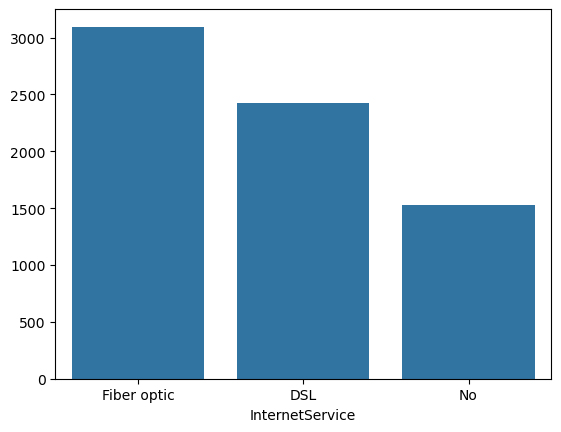

(None,
 InternetService
 Fiber optic    3096
 DSL            2421
 No             1526
 Name: count, dtype: int64)

In [15]:
df.explorer.categorical_dist('InternetService')

- It is of type object64; it is necessary to map it for one-hot encoding.
- The "No" category can be explained by the other categories and can be removed.

## Exploring the "OnlineSecurity" column:

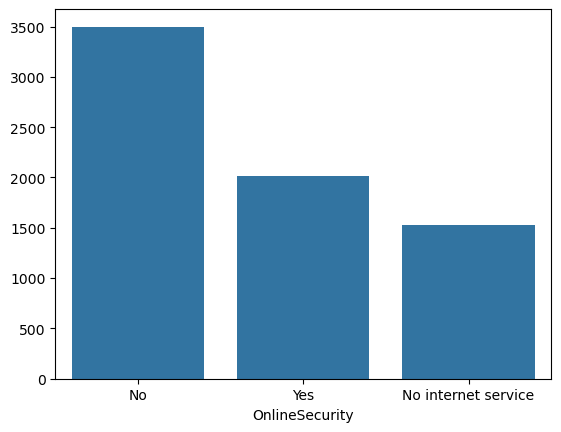

(None,
 OnlineSecurity
 No                     3498
 Yes                    2019
 No internet service    1526
 Name: count, dtype: int64)

In [16]:
df.explorer.categorical_dist('OnlineSecurity')


- It contains some "No internet service" values, which are redundant because if the customer doesn't have internet service, it can be inferred that they don't have the OnlineSecurity service. Therefore, it is necessary to replace "No internet service" with "No".
- The number of customers who don't have Online Security is more than double the number of those who do.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "OnlineBackup" column:

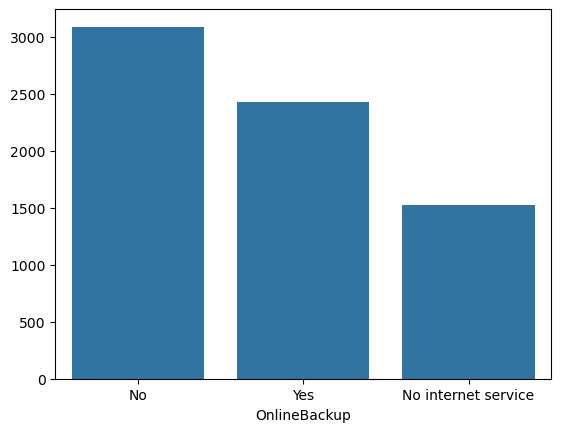

(None,
 OnlineBackup
 No                     3088
 Yes                    2429
 No internet service    1526
 Name: count, dtype: int64)

In [17]:
df.explorer.categorical_dist('OnlineBackup')

- It contains some "No internet service" values, which are redundant because if the customer doesn't have internet service, it can be inferred that they don't have the OnlineBackup service. Therefore, it is necessary to replace "No internet service" with "No".
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "DeviceProtection" column:

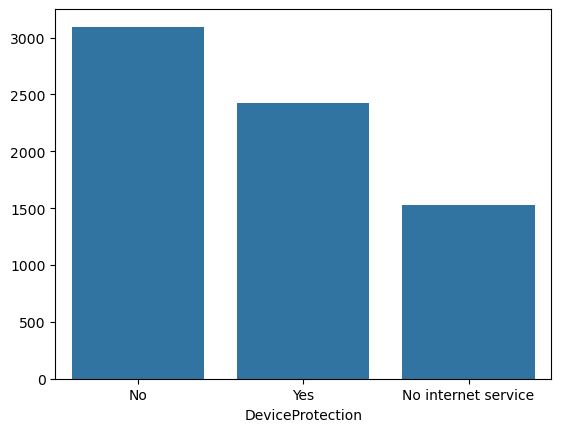

(None,
 DeviceProtection
 No                     3095
 Yes                    2422
 No internet service    1526
 Name: count, dtype: int64)

In [18]:
df.explorer.categorical_dist('DeviceProtection')

- The "No internet service" values can be explained by the "InternetService" column.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "TechSupport" column:

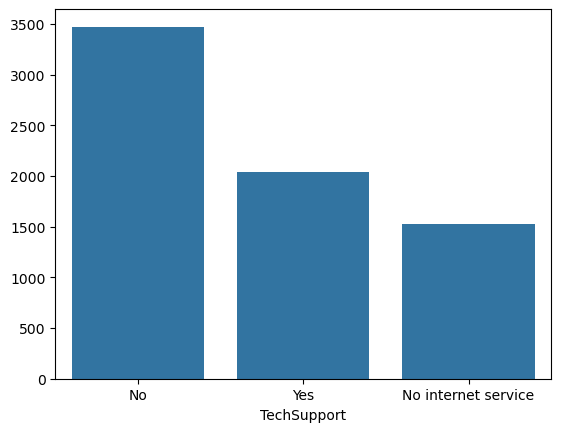

(None,
 TechSupport
 No                     3473
 Yes                    2044
 No internet service    1526
 Name: count, dtype: int64)

In [19]:
df.explorer.categorical_dist('TechSupport')

- The "No internet service" values can be explained by the "InternetService" column.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "StreamingTV" column:

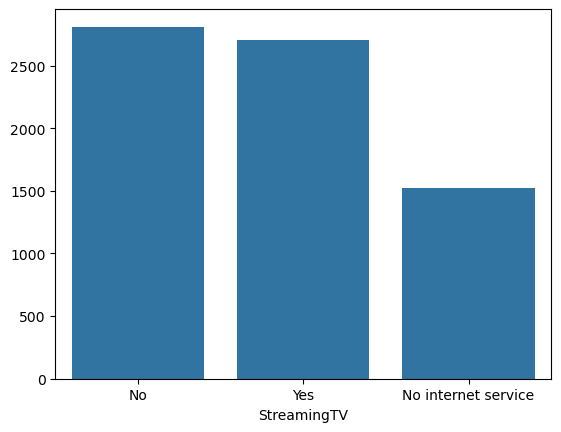

(None,
 StreamingTV
 No                     2810
 Yes                    2707
 No internet service    1526
 Name: count, dtype: int64)

In [20]:
df.explorer.categorical_dist('StreamingTV')

- The "No internet service" values can be explained by the "InternetService" column.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "StreamingMovies" column:

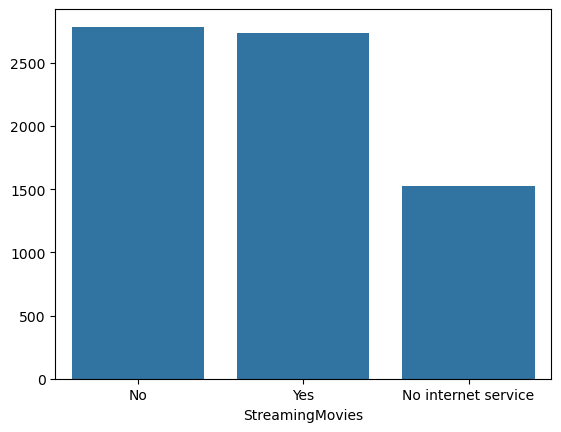

(None,
 StreamingMovies
 No                     2785
 Yes                    2732
 No internet service    1526
 Name: count, dtype: int64)

In [21]:
df.explorer.categorical_dist('StreamingMovies')

- The "No internet service" values can be explained by the "InternetService" column.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "Contract" column:

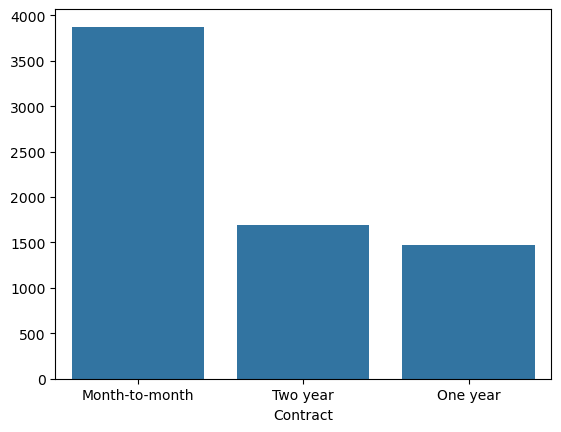

(None,
 Contract
 Month-to-month    3875
 Two year          1695
 One year          1473
 Name: count, dtype: int64)

In [22]:
df.explorer.categorical_dist('Contract')

- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "PaperlessBilling" column:

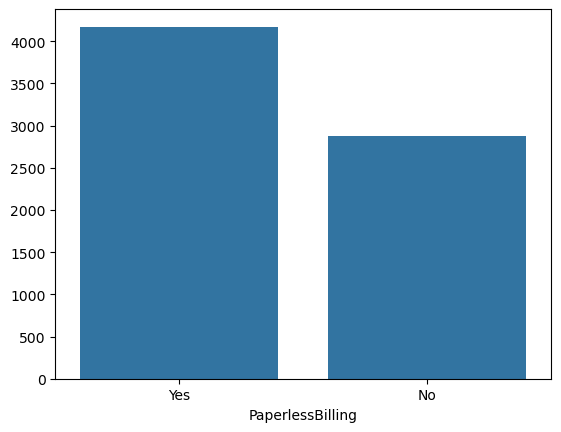

(None,
 PaperlessBilling
 Yes    4171
 No     2872
 Name: count, dtype: int64)

In [23]:
df.explorer.categorical_dist('PaperlessBilling')

- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "PaymentMethod" column:

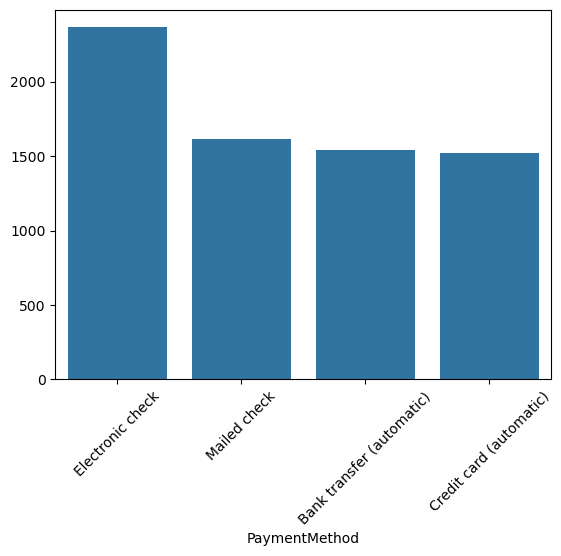

(None,
 PaymentMethod
 Electronic check             2365
 Mailed check                 1612
 Bank transfer (automatic)    1544
 Credit card (automatic)      1522
 Name: count, dtype: int64)

In [24]:
df.explorer.categorical_dist('PaymentMethod',45)

- Most customers use an electronic check as the payment method.
- It is of type object64; it is necessary to map it for one-hot encoding.

## Exploring the "MonthlyCharges" column:

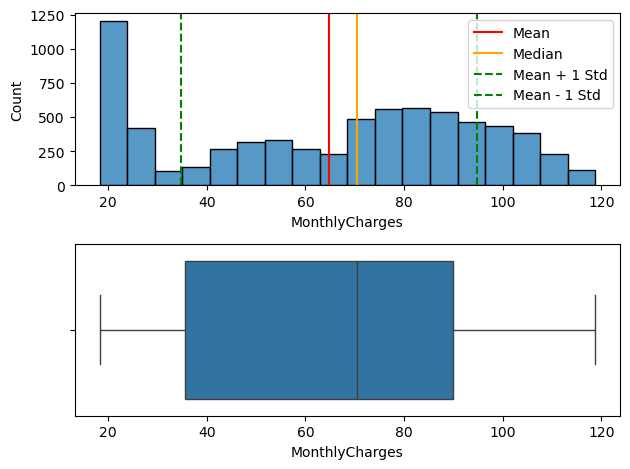

(None,
 MonthlyCharges
 20.05     61
 19.85     45
 19.95     44
 19.90     44
 20.00     43
           ..
 23.65      1
 114.70     1
 43.65      1
 87.80      1
 78.70      1
 Name: count, Length: 1585, dtype: int64)

In [25]:
df.explorer.numerical_dist('MonthlyCharges')

- There is a significant concentration in the twenties and eighties ranges.
- The distribution is unknown; a non-linear transformation may be needed.

## Exploring the "TotalCharges" column:

In [26]:
df.TotalCharges.apply(type).value_counts()

TotalCharges
<class 'str'>      7032
<class 'float'>      11
Name: count, dtype: int64

#### It contains some 'str' values.

- Converting the TotalCharges values from string format to float.

In [27]:
df.TotalCharges = df.TotalCharges.astype(float)
df.TotalCharges.apply(type).value_counts()

TotalCharges
<class 'float'>    7043
Name: count, dtype: int64

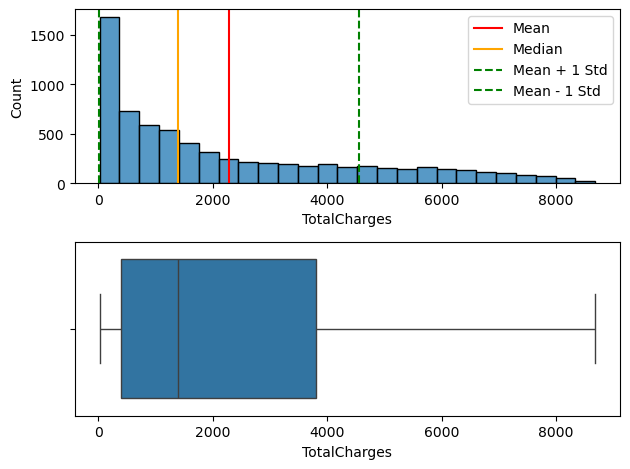

(None,
 TotalCharges
 20.20      11
 19.75       9
 20.05       8
 19.90       8
 19.65       8
            ..
 6849.40     1
 692.35      1
 130.15      1
 3211.90     1
 6844.50     1
 Name: count, Length: 6530, dtype: int64)

In [28]:
df[df.notnull()].explorer.numerical_dist('TotalCharges')

- The `TotalCharges` column exhibits a right-skewed distribution. This means that most of the data points are concentrated on the left side of the distribution, with a tail extending to the right. In other words, while many customers have lower total charges, there are a few customers with significantly higher charges that pull the mean to the right. This characteristic can affect statistical analyses and modeling, as it may lead to a situation where the mean is greater than the median. A non-linear Transformation can be needed.
- It has some NaN values.


## Exploring the "Churn" column:

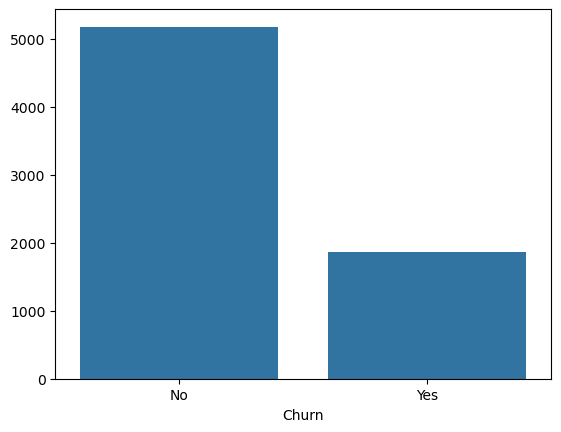

(None,
 Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64)

In [29]:
df.explorer.categorical_dist('Churn')

- The "Churn" column exhibits an unbalanced distribution, with a higher number of negative (No) values, indicating that most customers do not leave the company.
- It is of type object64, so it is necessary to map it for one-hot encoding.

## Exploring registers of customers who don't have Internet Service:

In [30]:
filter_ = df['InternetService'] == 'No'
df[filter_]

def checking_IS(data):
    cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    data = data[cols]
    filter_ = (data != "No internet service").any(axis=1)
    return data[filter_].sum()
checking_IS(df[filter_])

OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: object

- It has been verified that all columns —Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies— consistently indicate that these customers do not have access to internet service. It has been confirmed that there are no inconsistencies among the columns related to internet services. This suggests that the data in this subset is coherent and that there are no contradictory records regarding the availability of internet services for the analyzed customers.
- It is necessary to handle these records to avoid creating redundant categories.

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Conclusions

In this first exploration notebook, an initial examination of the dataset was conducted to gain a better understanding of its structure and contents. This analysis provided valuable insights into the relationships between features and the target variable. With this foundational knowledge, the next step will be to proceed to the data cleaning phase to prepare the dataset for further analysis and modeling.
